<h1> Imporatation des packages </h1>

In [1]:
#importer tous les packages nécessaires.
from io import BytesIO
import requests
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import math
import time
import re
import random
import os
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity  
from sklearn.metrics import pairwise_distances
from matplotlib import gridspec
from scipy.sparse import hstack
import plotly
import plotly.figure_factory as ff
from plotly.graph_objs import Scatter, Layout

plotly.offline.init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")

### Importation des données 

In [2]:
from pprint import pprint
data = pd.read_json('tops_fashion.json')
print ('Nombre de data points : ', data.shape[0], \
       'Nombre de features/variables:', data.shape[1])

pprint(data.columns)
data

Nombre de data points :  183138 Nombre de features/variables: 19
Index(['sku', 'asin', 'product_type_name', 'formatted_price', 'author',
       'color', 'brand', 'publisher', 'availability', 'reviews',
       'large_image_url', 'availability_type', 'small_image_url',
       'editorial_review', 'title', 'model', 'medium_image_url',
       'manufacturer', 'editorial_reivew'],
      dtype='object')


,sku,asin,product_type_name,formatted_price,author,color,brand,publisher,availability,reviews,large_image_url,availability_type,small_image_url,editorial_review,title,model,medium_image_url,manufacturer,editorial_reivew
0,None,B016I2TS4W,SHIRT,None,None,None,FNC7C,None,None,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,Minions Como Superheroes Ironman Women's O Nec...,Minions Como Superheroes Ironman Long Sleeve R...,None,https://images-na.ssl-images-amazon.com/images...,None,NaN
1,None,B01N49AI08,SHIRT,None,None,None,FIG Clothing,None,None,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,Sizing runs on the small side. FIG® recommends...,FIG Clothing Womens Izo Tunic,None,https://images-na.ssl-images-amazon.com/images...,None,NaN
2,None,B01JDPCOHO,SHIRT,None,None,None,FIG Clothing,None,None,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,Sizing runs on the small side. FIG® recommends...,FIG Clothing Womens Won Top,None,https://images-na.ssl-images-amazon.com/images...,None,NaN
3,None,B01N19U5H5,SHIRT,None,None,None,Focal18,None,None,"[True, https://www.amazon.com/reviews/iframe?a...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,100% Brand New & Fashion<br> Quantity: 1 Piece...,Focal18 Sailor Collar Bubble Sleeve Blouse Shi...,None,https://images-na.ssl-images-amazon.com/images...,None,NaN
4,None,B004GSI2OS,SHIRT,$26.26,None,Onyx Black/ Stone,FeatherLite,None,Usually ships in 6-10 business days,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,now,https://images-na.ssl-images-amazon.com/images...,,Featherlite Ladies' Long Sleeve Stain Resistan...,None,https://images-na.ssl-images-amazon.com/images...,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183133,None,B01MSALTSO,OUTERWEAR,$14.58,None,Black,TOOGOO(R),None,Usually ships in 1-2 business days,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,now,https://images-na.ssl-images-amazon.com/images...,NaN,TOOGOO(R) Women's Tops Spring Autumn Casual Pu...,089106A4,https://images-na.ssl-images-amazon.com/images...,None,<b>* TOOGOO is a registered trademark. ONLY Au...
183134,None,B015W98YQK,SHIRT,None,None,Monochrome Plaid,VOGUE CODE,None,None,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,NaN,VOGUE CODE Vintage V Neck Plaid Shirt Sleevele...,None,https://images-na.ssl-images-amazon.com/images...,None,"SIZE CHART <p> XS for length of front 27.6""; l..."
183135,None,B075756PGC,SHIRT,None,None,Pink,Wrangler,None,None,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,NaN,Wrangler George Strait For Her Long Sleeve Pin...,LGS7089,https://images-na.ssl-images-amazon.com/images...,None,Pretty pink print button down Western shirt fr...
183136,None,B074L8FVTT,SHIRT,$44.99,None,Rose,susana monaco,susana monaco,Usually ships in 2-3 business days,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,now,https://images-na.ssl-images-amazon.com/images...,NaN,Susana Monaco Womens Susana Monoco Sleeveless ...,None,https://images-na.ssl-images-amazon.com/images...,susana monaco,Color/pattern: rose. Approximately 23in from s...


Sur ces 19 fonctionnalités, nous n’utiliserons que 6 dans ce projet.
<li>
    1. asin (numéro d’identification standard Amazon)
    2. brand (marque à laquelle le produit appartient)
    3. color (renseignements sur la couleur des vêtements, il peut contenir plusieurs couleurs comme valeur, p. ex., rayures rouges et noires) 
    4. product_type_name (type de l’apperal, ex : SHIRT/TSHIRT )
    5. medium_image_url  ( url de l’image )
    6. title (titre du produit)
    7. formated_price (prix du produit)

In [3]:
data = data[['asin', 'brand', 'color', 'medium_image_url', 'product_type_name', 'title', 'formatted_price']]
print ('Number of data points : ', data.shape[0], \
       'Number of features:', data.shape[1])
data.head()

Number of data points :  183138 Number of features: 7


,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
0,B016I2TS4W,FNC7C,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,Minions Como Superheroes Ironman Long Sleeve R...,None
1,B01N49AI08,FIG Clothing,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,FIG Clothing Womens Izo Tunic,None
2,B01JDPCOHO,FIG Clothing,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,FIG Clothing Womens Won Top,None
3,B01N19U5H5,Focal18,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,Focal18 Sailor Collar Bubble Sleeve Blouse Shi...,None
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,Featherlite Ladies' Long Sleeve Stain Resistan...,$26.26


# Prétraitement des données

### Suppression des valeurs nulles

In [4]:
data = data.loc[~data['formatted_price'].isnull()]
print('Number of data points After eliminating price=NULL :', data.shape[0])

data =data.loc[~data['color'].isnull()]
print('Number of data points After eliminating color=NULL :', data.shape[0])


Number of data points After eliminating price=NULL : 28395
Number of data points After eliminating color=NULL : 28385


### Retirer les produits avec une brève description

In [5]:
# Remove All products with very few words in title
data_sorted = data[data['title'].apply(lambda x: len(x.split())>4)]
print("After removal of products with short description:", data_sorted.shape[0])

After removal of products with short description: 27949


### Suppression des produits avec double titre par tri 

<pre>
Titles 1:
16. woman's place is in the house and the senate shirts for Womens XXL White
17. woman's place is in the house and the senate shirts for Womens M Grey

Title 2:
25. tokidoki The Queen of Diamonds Women's Shirt X-Large
26. tokidoki The Queen of Diamonds Women's Shirt Small
27. tokidoki The Queen of Diamonds Women's Shirt Large

Title 3:
61. psychedelic colorful Howling Galaxy Wolf T-shirt/Colorful Rainbow Animal Print Head Shirt for woman Neon Wolf t-shirt
62. psychedelic colorful Howling Galaxy Wolf T-shirt/Colorful Rainbow Animal Print Head Shirt for woman Neon Wolf t-shirt
63. psychedelic colorful Howling Galaxy Wolf T-shirt/Colorful Rainbow Animal Print Head Shirt for woman Neon Wolf t-shirt
64. psychedelic colorful Howling Galaxy Wolf T-shirt/Colorful Rainbow Animal Print Head Shirt for woman Neon Wolf t-shirt
</pre>

In [6]:
print('The number of entries with duplicate title is %d'%sum(data.duplicated('title')))
# Trier l’ensemble des données en fonction du titre (ordre alphabétique du titre) 
data_sorted.sort_values('title',inplace=True, ascending=False)

indices = []
for i,row in data_sorted.iterrows():
    indices.append(i)
import itertools
stage1_dedupe_asins = []
i = 0
j = 0
num_data_points = data_sorted.shape[0]
while i < num_data_points and j < num_data_points:    
    previous_i = i
    # store the list of words of ith string in a, ex: a = ['tokidoki', 'The', 'Queen', 'of', 'Diamonds', 'Women's', 'Shirt', 'X-Large']
    a = data['title'].loc[indices[i]].split()
    # search for the similar products sequentially 
    j = i+1
    while j < num_data_points:
        # store the list of words of jth string in b, ex: b = ['tokidoki', 'The', 'Queen', 'of', 'Diamonds', 'Women's', 'Shirt', 'Small']
        b = data['title'].loc[indices[j]].split()
        # store the maximum length of two strings
        length = max(len(a), len(b))
        # count is used to store the number of words that are matched in both strings
        count  = 0
        # itertools.zip_longest(a,b): will map the corresponding words in both strings, it will appened None in case of unequal strings
        # example: a =['a', 'b', 'c', 'd']
        # b = ['a', 'b', 'd']
        # itertools.zip_longest(a,b): will give [('a','a'), ('b','b'), ('c','d'), ('d', None)]
        for k in itertools.zip_longest(a,b): 
            if (k[0] == k[1]):
                count += 1
        # if the number of words in which both strings differ are > 2 , we are considering it as those two apperals are different
        # if the number of words in which both strings differ are < 2 , we are considering it as those two apperals are same, hence we are ignoring them
        if (length - count) > 2: # number of words in which both sensences differ
            # if both strings are differ by more than 2 words we include the 1st string index
            stage1_dedupe_asins.append(data_sorted['asin'].loc[indices[i]])
            # if the comaprision between is between num_data_points, num_data_points-1 strings and they differ in more than 2 words we include both
            if j == num_data_points-1: stage1_dedupe_asins.append(data_sorted['asin'].loc[indices[j]])
            # start searching for similar apperals corresponds 2nd string
            i = j
            break
        else:
            j += 1
    if previous_i == i:
        break

data = data.loc[data['asin'].isin(stage1_dedupe_asins)]
print('Number of data points now is: ', data.shape[0])

The number of entries with duplicate title is 2325
Number of data points now is:  17593


<pre>

In the previous cell, we sorted whole data in alphabetical order of  titles.Then, we removed titles which are adjacent and very similar title

But there are some products whose titles are not adjacent but very similar.

Examples:

Titles-1
86261.  UltraClub Women's Classic Wrinkle-Free Long Sleeve Oxford Shirt, Pink, XX-Large
115042. UltraClub Ladies Classic Wrinkle-Free Long-Sleeve Oxford Light Blue XXL

TItles-2
75004.  EVALY Women's Cool University Of UTAH 3/4 Sleeve Raglan Tee
109225. EVALY Women's Unique University Of UTAH 3/4 Sleeve Raglan Tees
120832. EVALY Women's New University Of UTAH 3/4-Sleeve Raglan Tshirt

</pre>

# Prétraitement du texte

In [7]:
# Nous utilisons la liste des mots clés que vous avez téléchargée de nltk lib.
stop_words = set(stopwords.words('english'))
print ('list of stop words:', stop_words)

def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        for words in total_text.split():
            # supprimer les caractères spéciaux en revue like '"#$@!%^&*()_+-~?>< etc.
            word = ("".join(e for e in words if e.isalnum()))
            # Convertissez toutes les lettres en lower-case
            word = word.lower()
            # suppression de mot-clé
            if not word in stop_words:
                string += word + " "
        data[column][index] = string

list of stop words: {'very', "didn't", 'on', 'down', 'will', 'can', "you're", 'm', 'your', 'o', 'couldn', 'other', 't', 'if', 'y', 'because', 'now', 'ma', 'her', 'before', 'wasn', 'while', 'off', 'the', 'such', 'why', 'shan', 'herself', "hasn't", 'isn', 'against', 'few', 'himself', 'how', 'weren', 'about', "you'll", 'do', 'most', 'hadn', 'or', 'doesn', "shan't", 'myself', 's', "won't", 'at', 'it', 'what', 'its', 'me', "that'll", 'for', 'from', 'didn', 'them', "don't", 'to', 'ain', 'mightn', 'been', "hadn't", 'yourself', 'mustn', 'below', 'by', 'in', 'd', 'so', 'any', "you'd", 'am', 'we', 'ourselves', 'both', 'a', 'as', 'won', 'when', 'whom', 'which', 'ours', 'an', 'up', 'more', 'has', "she's", 'i', 'she', 'shouldn', 'wouldn', "you've", 'and', 'that', "needn't", 'he', 'was', 'this', 'after', 'under', 'having', 'during', 'have', 'these', 'further', 'those', 'too', 'is', 'no', 'same', 'don', 'aren', 'did', 'you', 'than', 'being', 'our', 'nor', 'haven', "isn't", 'his', 'doing', "couldn't",

In [8]:
data.head()

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,Featherlite Ladies' Long Sleeve Stain Resistan...,$26.26
6,B012YX2ZPI,HX-Kingdom Fashion T-shirts,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,Women's Unique 100% Cotton T - Special Olympic...,$9.99
15,B003BSRPB0,FeatherLite,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,FeatherLite Ladies' Moisture Free Mesh Sport S...,$20.54
27,B014ICEJ1Q,FNC7C,Purple,https://images-na.ssl-images-amazon.com/images...,SHIRT,Supernatural Chibis Sam Dean And Castiel O Nec...,$7.39
43,B0079BMKDS,FeatherLite,White,https://images-na.ssl-images-amazon.com/images...,APPAREL,Featherlite Ladies' Silky Smooth Pique (White)...,$13.53


In [9]:
data["digital"]=False

In [10]:
data['digital'] = data['digital'].astype('bool')

<h3> Suppression des outliers </h3>

In [11]:
data['formatted_price']=data['formatted_price'].apply(lambda x: x.replace('$',''))

In [12]:
data.drop(data.loc[data['formatted_price']=='1,129.99'].index, inplace=True)

In [13]:
data.drop(data.loc[data['formatted_price']=="Too low to display"].index, inplace=True)

In [14]:
data['formatted_price'] = data['formatted_price'].astype('float')

In [15]:
data["color"] = data["color"].str.lower()

In [16]:
data.head()

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price,digital
4,B004GSI2OS,FeatherLite,onyx black/ stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,Featherlite Ladies' Long Sleeve Stain Resistan...,26.26,False
6,B012YX2ZPI,HX-Kingdom Fashion T-shirts,white,https://images-na.ssl-images-amazon.com/images...,SHIRT,Women's Unique 100% Cotton T - Special Olympic...,9.99,False
15,B003BSRPB0,FeatherLite,white,https://images-na.ssl-images-amazon.com/images...,SHIRT,FeatherLite Ladies' Moisture Free Mesh Sport S...,20.54,False
27,B014ICEJ1Q,FNC7C,purple,https://images-na.ssl-images-amazon.com/images...,SHIRT,Supernatural Chibis Sam Dean And Castiel O Nec...,7.39,False
43,B0079BMKDS,FeatherLite,white,https://images-na.ssl-images-amazon.com/images...,APPAREL,Featherlite Ladies' Silky Smooth Pique (White)...,13.53,False


<h3> Addition des columns gender et reduire le nombre des couleurs possible à l'aide de RegEx </h3>

In [17]:
def replace_gender(m):
    gender_men=["men","boy","man","guy"]
    match = [re.findall(c, m) for c in gender_men]
    match = list(filter(None, match))
    match = np.squeeze(np.array(match))
    match = np.squeeze(np.array(match))
    if match.size>0:    
        try:
            match = ",".join(match)
        except:
            return "men"
        finally:
            return "men"
    elif match.size==0:
        gender_women=["women","girl","ladi","lady"]
        match = [re.findall(c, m) for c in gender_women]
        match = list(filter(None, match))
        match = np.squeeze(np.array(match))
        match = np.squeeze(np.array(match))
        try:
            match = ",".join(match)
        except:
            return "women"
        finally:
            return "women"
    else:
        return "Unisex"

In [18]:
#data["title"].unique()

In [19]:
#data["gender"] = "Unisex"
#data["gender"] = data["title"].apply(lambda x: replace_gender(x))
#data.head(100)

In [20]:
#data["gender"].describe()

In [21]:
def replace_colors(m):
    colors=["red", "grey","natural","multicol","red orange", "orange", "yellow","yellow green", "green", "sky blue", "blue", "violet", "brown", "black","purple","Berry",'Beige', "white", "gray", "magenta", "pink", "light blue", "aqua green", "jade green", "peach", "golden", 'navy',"yellow", "yellow orange", "mahogany", "tan" , "light brown"]
    match = [re.findall(c, m) for c in colors]
    match = list(filter(None, match))
    match = np.squeeze(np.array(match))
    match = np.squeeze(np.array(match))
    if match.size>0:    
        try:
            match = ",".join(match)
        except:
            return match
        finally:
            return match
    else:
        match = random.choice(colors)
        return match

In [22]:
data["color"] = data["color"].apply(lambda x: replace_colors(x))

In [23]:
start_time = time.time()
# On prend chaque titre et on le pré-traite.
for index, row in data.iterrows():
    nlp_preprocessing(row['title'], index, 'title')
print(time.time() - start_time, "seconds")



33.691221952438354 seconds


In [24]:
data['brand'] = data['brand'].astype(str)

In [25]:
data.drop(data.loc[data['brand']=="None"].index, inplace=True)

In [26]:
start_time = time.time()
# On prend chaque marque et on le pré-traite.
for index, row in data.iterrows():
    nlp_preprocessing(row['brand'], index, 'brand')
print(time.time() - start_time, "seconds")

data.head()


30.969709396362305 seconds


,asin,brand,color,medium_image_url,product_type_name,title,formatted_price,digital
4,B004GSI2OS,featherlite,black,https://images-na.ssl-images-amazon.com/images...,SHIRT,featherlite ladies long sleeve stain resistant...,26.26,False
6,B012YX2ZPI,hxkingdom fashion tshirts,white,https://images-na.ssl-images-amazon.com/images...,SHIRT,womens unique 100 cotton special olympics wor...,9.99,False
15,B003BSRPB0,featherlite,white,https://images-na.ssl-images-amazon.com/images...,SHIRT,featherlite ladies moisture free mesh sport sh...,20.54,False
27,B014ICEJ1Q,fnc7c,purple,https://images-na.ssl-images-amazon.com/images...,SHIRT,supernatural chibis sam dean castiel neck tshi...,7.39,False
43,B0079BMKDS,featherlite,white,https://images-na.ssl-images-amazon.com/images...,APPAREL,featherlite ladies silky smooth pique white xl,13.53,False


In [27]:
data.reset_index(inplace=True)

In [28]:
data.drop("index",axis=1,inplace=True)

In [29]:
data['color'] = data['color'].astype(str)

In [30]:
def convrt_remove_dup(x):
    x =x.split(",")
    x = list(dict.fromkeys(x))
    x = ",".join(x)
    return x

In [31]:
data["color"] = data["color"].apply(lambda x: convrt_remove_dup(x))

In [32]:
data['color'] = data['color'].astype(str)

In [33]:
data.drop([9132, 11131,4629,12074, 13908,13373,5549,4060,13579,15783,16517],axis=0,inplace=True)

In [34]:
data.drop_duplicates(subset='medium_image_url', keep="last",inplace=True)

In [35]:
data = data[data['brand'].notna()]

In [36]:
data.reset_index(inplace=True)

In [37]:
df=pd.read_csv("final.csv")

In [38]:
df.drop(["Unnamed: 0","level_0"],axis=1,inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16315 entries, 0 to 16314
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              16315 non-null  int64  
 1   asin               16315 non-null  object 
 2   brand              16315 non-null  object 
 3   color              16315 non-null  object 
 4   medium_image_url   16315 non-null  object 
 5   product_type_name  16315 non-null  object 
 6   title              16315 non-null  object 
 7   formatted_price    16315 non-null  float64
 8   digital            16315 non-null  bool   
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 1.0+ MB


In [40]:
df

,index,asin,brand,color,medium_image_url,product_type_name,title,formatted_price,digital
0,2,B003BSRPB0,featherlite,white,https://images-na.ssl-images-amazon.com/images...,SHIRT,featherlite ladies moisture free mesh sport sh...,20.54,False
1,3,B014ICEJ1Q,fnc7c,purple,https://images-na.ssl-images-amazon.com/images...,SHIRT,supernatural chibis sam dean castiel neck tshi...,7.39,False
2,4,B0079BMKDS,featherlite,white,https://images-na.ssl-images-amazon.com/images...,APPAREL,featherlite ladies silky smooth pique white xl,13.53,False
3,5,B01NACPBG2,fifth degree,black,https://images-na.ssl-images-amazon.com/images...,SHIRT,fifth degree womens gold foil graphic tees jun...,6.95,False
4,6,B00480IRZS,finebrandshop,green,https://images-na.ssl-images-amazon.com/images...,SHIRT,ladies green seamless ribbed diamond patterned...,7.90,False
...,...,...,...,...,...,...,...,...,...
16310,17535,B01MRV2IFS,yuelian,black,https://images-na.ssl-images-amazon.com/images...,SHIRT,yuelian womens chiffon short sleeves sun prote...,19.25,False
16311,17536,B01LY4QWLF,vintage america,white,https://images-na.ssl-images-amazon.com/images...,SHIRT,vintage america womens large lace collared blo...,23.24,False
16312,17537,B07167SCNH,tart collections,black,https://images-na.ssl-images-amazon.com/images...,SHIRT,tart womens collections ann wrap top xs black,29.99,False
16313,17538,B07575N2WX,soprano,gray,https://images-na.ssl-images-amazon.com/images...,SHIRT,soprano womens small tiefringe slubknit tank t...,22.83,False


In [41]:
df.reset_index(inplace=True)

In [42]:
df.rename(columns={"level_0": "id"},inplace=True)

DATA Connection

In [43]:
import sqlite3

In [44]:
conn = sqlite3.connect('db.sqlite3')

In [45]:
c = conn.cursor()

In [46]:
c.execute('CREATE TABLE IF NOT EXISTS store_product (id integer, asin text,brand text,color text,medium_image_url text,product_type_name text,title text, formatted_price float, digital boolean)')

conn.commit()

In [47]:
df.to_sql('store_product', conn, if_exists='replace', index = False)

In [48]:
conn.close()

In [49]:
df.to_csv("finalx.csv")

DATA EXTRACT

In [50]:
from sqlalchemy import create_engine

cnx = create_engine('sqlite:///db.sqlite3').connect()

dataframe_store_product = pd.read_sql_table('store_product', cnx)
dataframe_store_product

,id,index,asin,brand,color,medium_image_url,product_type_name,title,formatted_price,digital
0,0,2,B003BSRPB0,featherlite,white,https://images-na.ssl-images-amazon.com/images...,SHIRT,featherlite ladies moisture free mesh sport sh...,20.54,0
1,1,3,B014ICEJ1Q,fnc7c,purple,https://images-na.ssl-images-amazon.com/images...,SHIRT,supernatural chibis sam dean castiel neck tshi...,7.39,0
2,2,4,B0079BMKDS,featherlite,white,https://images-na.ssl-images-amazon.com/images...,APPAREL,featherlite ladies silky smooth pique white xl,13.53,0
3,3,5,B01NACPBG2,fifth degree,black,https://images-na.ssl-images-amazon.com/images...,SHIRT,fifth degree womens gold foil graphic tees jun...,6.95,0
4,4,6,B00480IRZS,finebrandshop,green,https://images-na.ssl-images-amazon.com/images...,SHIRT,ladies green seamless ribbed diamond patterned...,7.90,0
...,...,...,...,...,...,...,...,...,...,...
16310,16310,17535,B01MRV2IFS,yuelian,black,https://images-na.ssl-images-amazon.com/images...,SHIRT,yuelian womens chiffon short sleeves sun prote...,19.25,0
16311,16311,17536,B01LY4QWLF,vintage america,white,https://images-na.ssl-images-amazon.com/images...,SHIRT,vintage america womens large lace collared blo...,23.24,0
16312,16312,17537,B07167SCNH,tart collections,black,https://images-na.ssl-images-amazon.com/images...,SHIRT,tart womens collections ann wrap top xs black,29.99,0
16313,16313,17538,B07575N2WX,soprano,gray,https://images-na.ssl-images-amazon.com/images...,SHIRT,soprano womens small tiefringe slubknit tank t...,22.83,0


<h3> Fonctions utiles </h3>

In [51]:
# fonctions utiles

#Afficher une image
def display_img(url,ax,fig):
    # we get the url of the apparel and download it
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    # we will display it in notebook 
    plt.imshow(img)

#tracer le code pour comprendre la décision  
def plot_heatmap(keys, values, labels, url, text):
        # keys: list of words of recommended title
        # values: len(values) ==  len(keys), values(i) represents the occurence of the word keys(i)
        # labels: len(labels) == len(keys), the values of labels depends on the model we are using
                # if model == 'bag of words': labels(i) = values(i)
                # if model == 'tfidf weighted bag of words':labels(i) = tfidf(keys(i))
                # if model == 'idf weighted bag of words':labels(i) = idf(keys(i))
        # url : apparel's url
        # we will devide the whole figure into two parts
        gs = gridspec.GridSpec(2, 2, width_ratios=[4,1], height_ratios=[4,1]) 
        fig = plt.figure(figsize=(25,3))
        
        # 1st, ploting heat map that represents the count of commonly ocurred words in title2
        ax = plt.subplot(gs[0])
        # it displays a cell in white color if the word is intersection(lis of words of title1 and list of words of title2), in black if not
        ax = sns.heatmap(np.array([values]), annot=np.array([labels]))
        ax.set_xticklabels(keys) # set that axis labels as the words of title
        ax.set_title(text) # apparel title
        
        # 2nd, plotting image of the the apparel
        ax = plt.subplot(gs[1])
        # we don't want any grid lines for image and no labels on x-axis and y-axis
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        
        # we call dispaly_img based with paramete url
        display_img(url, ax, fig)
        
        # displays combine figure ( heat map and image together)
        plt.show()
    
def plot_heatmap_image(doc_id, vec1, vec2, url, text, model):
    # doc_id : index du titre 1
    # vec1 : vecteur des vêtements d’entrée, il est de type dict {word:count}
    # vec2 : vecteur des vêtements recommandés, il est de type dict {word:count}
    # url : url de l’image des vêtements
    # texte : titre des vêtements recomondés (utilisé pour conserver le titre de l’image)
    # model, il peut s’agir de n’importe lequel des modèles, 
        # 1. bag_of_words
        # 2. tfidf
        # 3. idf
    # nous trouvons les mots communs dans les deux titres, car ces seuls mots contribuent à la distance entre deux titres vec’s
    intersection = set(vec1.keys()) & set(vec2.keys()) 
    # we set the values of non intersecting words to zero, this is just to show the difference in heatmap
    for i in vec2:
        if i not in intersection:
            vec2[i]=0
    # for labeling heatmap, keys contains list of all words in title2
    keys = list(vec2.keys())
    #  if ith word in intersection(lis of words of title1 and list of words of title2): values(i)=count of that word in title2 else values(i)=0 
    values = [vec2[x] for x in vec2.keys()]    
    # labels: len(labels) == len(keys), the values of labels depends on the model we are using
        # if model == 'bag of words': labels(i) = values(i)
        # if model == 'tfidf weighted bag of words':labels(i) = tfidf(keys(i))
        # if model == 'idf weighted bag of words':labels(i) = idf(keys(i))
    if model == 'bag_of_words':
        labels = values
    elif model == 'tfidf':
        labels = []
        for x in vec2.keys():
            # tfidf_title_vectorizer.vocabulary_ it contains all the words in the corpus
            # tfidf_title_features[doc_id, index_of_word_in_corpus] will give the tfidf value of word in given document (doc_id)
            if x in  tfidf_title_vectorizer.vocabulary_:
                labels.append(tfidf_title_features[doc_id, tfidf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)
    elif model == 'idf':
        labels = []
        for x in vec2.keys():
            # idf_title_vectorizer.vocabulary_ it contains all the words in the corpus
            # idf_title_features[doc_id, index_of_word_in_corpus] will give the idf value of word in given document (doc_id)
            if x in  idf_title_vectorizer.vocabulary_:
                labels.append(idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)
    plot_heatmap(keys, values, labels, url, text)

# cette fonction obtient une liste de wrods avec la fréquence de chaque mot donné "texte"
def text_to_vector(text):
    word = re.compile(r'\w+')
    words = word.findall(text)
    # words stores list of all words in given string, you can try 'words = text.split()' 
    #this will also gives same result
    return Counter(words) # Counter counts the occurence of each word in list, 
    #it returns dict type object {word1:count}

def get_result(doc_id, content_a, content_b, url, model):
    text1 = content_a
    text2 = content_b    
    # vector1 = dict{word11:#count, word12:#count, etc.}
    vector1 = text_to_vector(text1)
    # vector1 = dict{word21:#count, word22:#count, etc.}
    vector2 = text_to_vector(text2)
    plot_heatmap_image(doc_id, vector1, vector2, url, text2, model)

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from nltk.stem.snowball import SnowballStemmer
import nltk
stemmer = SnowballStemmer("english")

Fonction pour le traitement de text

In [53]:
def clean_tokenize(document):
    document = re.sub('[^\w_\s-]', ' ',document)       #remove punctuation marks and other symbols
    tokens = nltk.word_tokenize(document)              #Tokenize sentences
    cleaned_article = ' '.join([stemmer.stem(item) for item in tokens])    #Stemming each token
    return cleaned_article

GLOBAL Model

In [54]:
idf_title_vectorizer = CountVectorizer()
idf_title_features = idf_title_vectorizer.fit_transform(data['title'])

def n_containing(word):
    # return the number of documents which had the given word
    return sum(1 for blob in data['title'] if word in blob.split())

def idf(word):
    # idf = log(#number of docs / #number of docs which had the given word)
    return math.log(data.shape[0] / (n_containing(word)))

idf_euclidean=[]
def idf_model(doc_id, num_results):
    M=[]
    pairwise_dist = pairwise_distances(idf_title_features,idf_title_features[doc_id])

    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    df_indices = list(data.index[indices])

    for i in range(0,len(indices)):

        M.append(data['asin'].loc[df_indices[i]])

    return M

tfidf_title_vectorizer = TfidfVectorizer(min_df = 0)
tfidf_title_features = tfidf_title_vectorizer.fit_transform(data['title'])
tf_idf_euclidean=[]
def tfidf_model(doc_id, num_results):

    L=[]
    pairwise_dist = pairwise_distances(tfidf_title_features,tfidf_title_features[doc_id])

    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    df_indices = list(data.index[indices])
    for i in range(0,len(indices)):
        L.append(data['asin'].loc[df_indices[i]])
    return L

title_vectorizer = CountVectorizer()
title_features   = title_vectorizer.fit_transform(data['title'])
title_features.get_shape()
bag_of_words_euclidean=[]
def bag_of_words_model(doc_id, num_results):

    B=[]
    pairwise_dist = pairwise_distances(title_features,title_features[doc_id])
    
    # np.argsort will return indices of the smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])
    
    for i in range(0,len(indices)):

        B.append(data['asin'].loc[df_indices[i]])

    return B

def global_model(doc_id,num_results):
    G= bag_of_words_model(doc_id,num_results) + tfidf_model(doc_id,num_results) + idf_model(doc_id,num_results)
    G = list(dict.fromkeys(G))
    return G
    

<h1> Partie des Models </h1>

## 1. Modèle de Bag of Words sur les titres de produits

In [55]:
title_vectorizer = CountVectorizer()
color_features   = title_vectorizer.fit_transform(df['color'])
title_features   = title_vectorizer.fit_transform(df['title'])



title_features.get_shape() # obtenir le nombre de lignes et de colonnes dans la matrice des fonctionnalités.
# title_features.shape = #data_points * #words_in_corpus
# CountVectorizer(). fit_transform(corpus) returns 
# la matrice sparase de dimensions #data_points * #words_in_corpus
bag_of_words_euclidean=[]
def bag_of_words_model(doc_id, num_results):
    # doc_id : apparel’s id in given corpus
    # pairwise_dist stockera la distance entre les vêtements d’entrée donnés et tous les autres vêtements
    # la métrique que nous avons utilisée ici est cosinus, la distance coside est mesurée a as K(X, Y) = <X, Y> / (||X||*||Y||)
    pairwise_dist = pairwise_distances(title_features,title_features[doc_id]) + pairwise_distances(color_features,color_features[doc_id])
    
    # np.argsort will return indices of the smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(df.index[indices])
    
    for i in range(0,len(indices)):
        # we will pass 1. doc_id, 2. title1, 3. title2, url, model
        get_result(indices[i],df['title'].loc[df_indices[0]], df['title'].loc[df_indices[i]], df['medium_image_url'].loc[df_indices[i]], 'bag_of_words')
        print('ASIN :',df['asin'].loc[df_indices[i]])
        print ('Brand:', df['brand'].loc[df_indices[i]])
        print ('Title:', df['title'].loc[df_indices[i]])
        bag_of_words_euclidean.append(pdists[i])
        print ('Euclidean similarity with the query image :', pdists[i])
        print('='*60)
    print('Average euclidean distance is ',sum(bag_of_words_euclidean)/num_results)



Getting the similar items for document id and number of items


<IPython.core.display.Javascript object>

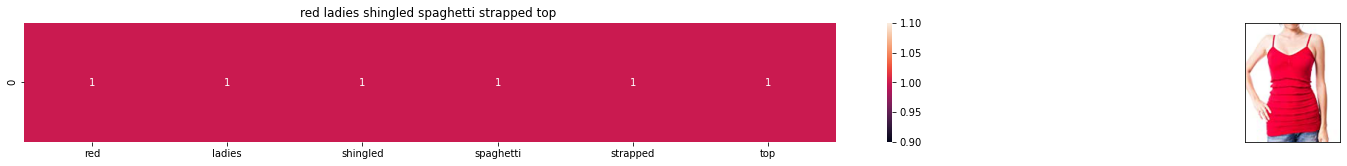

ASIN : B007G0XRVG
Brand: finebrandshop 
Title: red ladies shingled spaghetti strapped top 
Euclidean similarity with the query image : 0.0


<IPython.core.display.Javascript object>

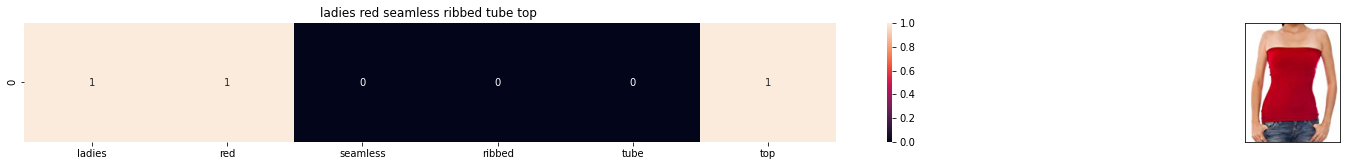

ASIN : B009286M3A
Brand: finebrandshop 
Title: ladies red seamless ribbed tube top 
Euclidean similarity with the query image : 2.449489742783178


<IPython.core.display.Javascript object>

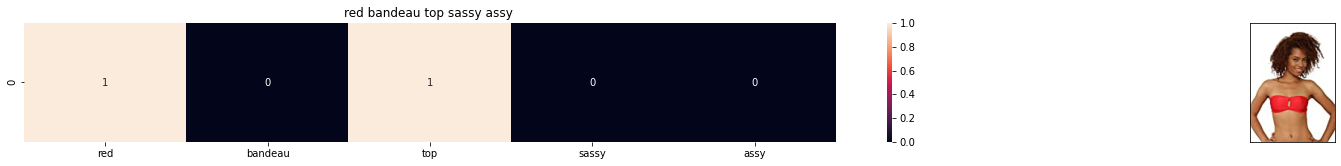

ASIN : B01G12MO8Q
Brand: sassy assy 
Title: red bandeau top sassy assy 
Euclidean similarity with the query image : 2.6457513110645907


<IPython.core.display.Javascript object>

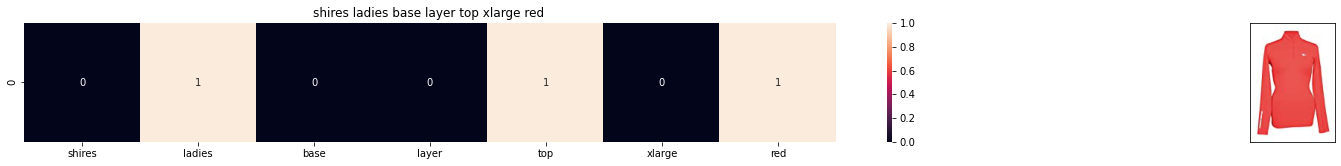

ASIN : B06XRDVT37
Brand: shires 
Title: shires ladies base layer top xlarge red 
Euclidean similarity with the query image : 2.6457513110645907


<IPython.core.display.Javascript object>

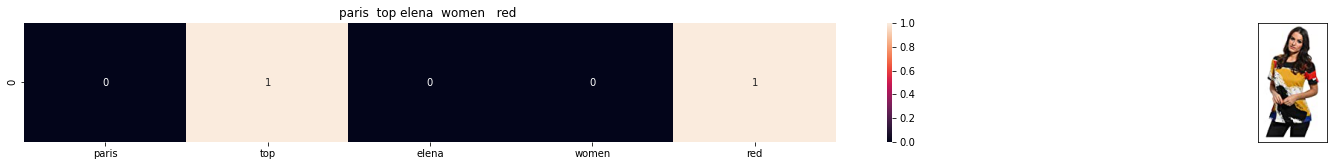

ASIN : B06XHVTN8C
Brand: paris 
Title: paris  top elena  women   red 
Euclidean similarity with the query image : 2.6457513110645907


<IPython.core.display.Javascript object>

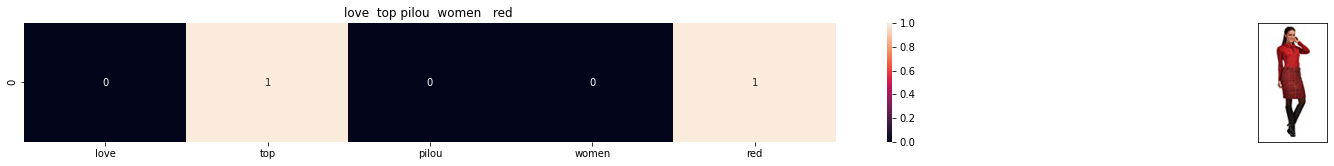

ASIN : B017RPMWSI
Brand: welove 
Title: love  top pilou  women   red 
Euclidean similarity with the query image : 2.6457513110645907


<IPython.core.display.Javascript object>

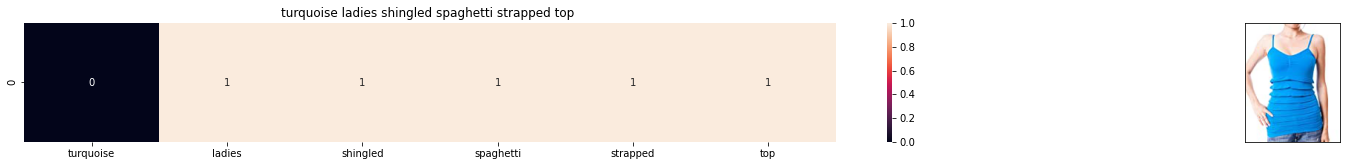

ASIN : B007G0XSUQ
Brand: finebrandshop 
Title: turquoise ladies shingled spaghetti strapped top 
Euclidean similarity with the query image : 2.8284271247461903


<IPython.core.display.Javascript object>

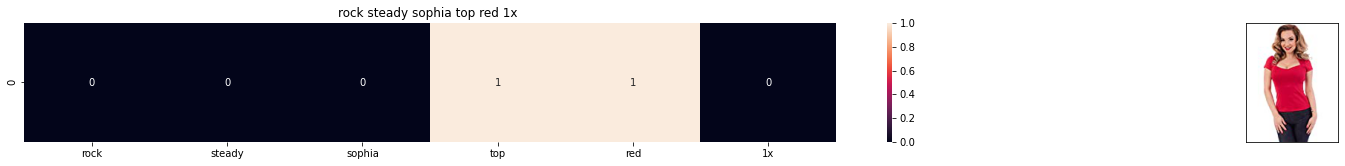

ASIN : B012HIFP2K
Brand: rock steady 
Title: rock steady sophia top red 1x 
Euclidean similarity with the query image : 2.8284271247461903


<IPython.core.display.Javascript object>

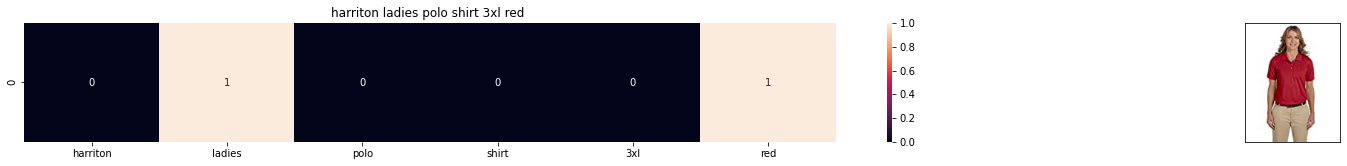

ASIN : B00B27UYCE
Brand: harriton 
Title: harriton ladies polo shirt 3xl red 
Euclidean similarity with the query image : 2.8284271247461903


<IPython.core.display.Javascript object>

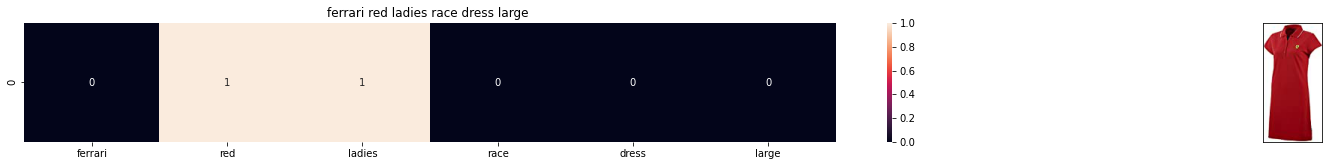

ASIN : B00UOR7UAM
Brand: ferrari 
Title: ferrari red ladies race dress large 
Euclidean similarity with the query image : 2.8284271247461903


<IPython.core.display.Javascript object>

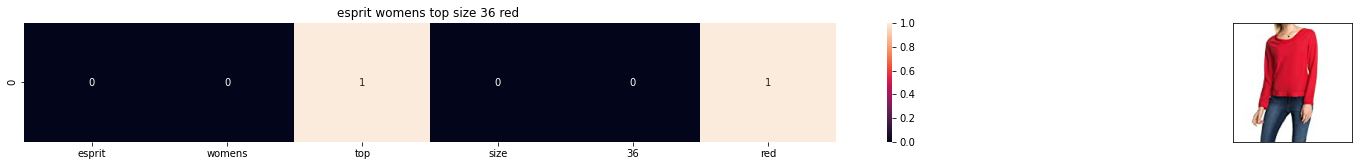

ASIN : B00MRYYUTE
Brand: esprit 
Title: esprit womens top size 36 red 
Euclidean similarity with the query image : 2.8284271247461903


<IPython.core.display.Javascript object>

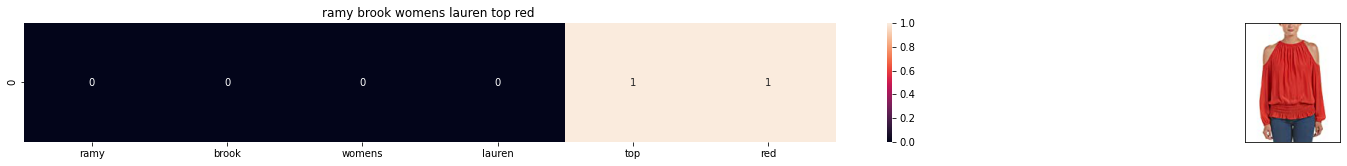

ASIN : B074NKDHWT
Brand: ramy brook 
Title: ramy brook womens lauren top red 
Euclidean similarity with the query image : 2.8284271247461903
Average euclidean distance is  2.500254811293224


In [56]:
#appeler le modèle de sac de mots pour un produit pour obtenir des produits similaires.
print('Getting the similar items for document id and number of items')
bag_of_words_model(74, 12)
# Dans la carte thermique de sortie, chaque valeur représente la valeur de comptage 
# du mot d’étiquette, la couleur représente l’intersection
# avec le titre des entrées.

## 2.Modèle de TF-IDF sur les titres de produits

In [57]:
tfidf_title_vectorizer = TfidfVectorizer(min_df = 0)
tfidf_title_features = tfidf_title_vectorizer.fit_transform(data['title'])
tf_idf_euclidean=[]
def tfidf_model(doc_id, num_results):

    L=[]
    pairwise_dist = pairwise_distances(tfidf_title_features,tfidf_title_features[doc_id])

    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    df_indices = list(data.index[indices])
    for i in range(0,len(indices)):
        L.append(data['asin'].loc[df_indices[i]])
    return L


In [58]:
tfidf_title_vectorizer = TfidfVectorizer(min_df = 0)
tfidf_title_features = tfidf_title_vectorizer.fit_transform(data['title'])
# tfidf_title_features.shape = #data_points * #words_in_corpus
# CountVectorizer().fit_transform(courpus) returns the a sparase matrix of dimensions #data_points * #words_in_corpus
# tfidf_title_features[doc_id, index_of_word_in_corpus] = tfidf values of the word in given doc
tf_idf_euclidean=[]
def tfidf_model(doc_id, num_results):
    # doc_id: apparel's id in given corpus
    
    # pairwise_dist will store the distance from given input apparel to all remaining apparels
    # the metric we used here is cosine, the coside distance is mesured as K(X, Y) = <X, Y> / (||X||*||Y||)
    # http://scikit-learn.org/stable/modules/metrics.html#cosine-similarity
    pairwise_dist = pairwise_distances(tfidf_title_features,tfidf_title_features[doc_id])

    # np.argsort will return indices of 9 smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the 9 smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])

    for i in range(0,len(indices)):
        # we will pass 1. doc_id, 2. title1, 3. title2, url, model
        get_result(indices[i], data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]],data['medium_image_url'].loc[df_indices[i]], 'tfidf')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print('BRAND :',data['brand'].loc[df_indices[i]])
        tf_idf_euclidean.append(pdists[i])
        print ('Eucliden distance from the given image :', pdists[i])
        print('='*125)
    print('Average euclidean distance is',sum(tf_idf_euclidean)/num_results)


RETURNING ONLY IDS

Getting the similar items for document id and number of items


<IPython.core.display.Javascript object>

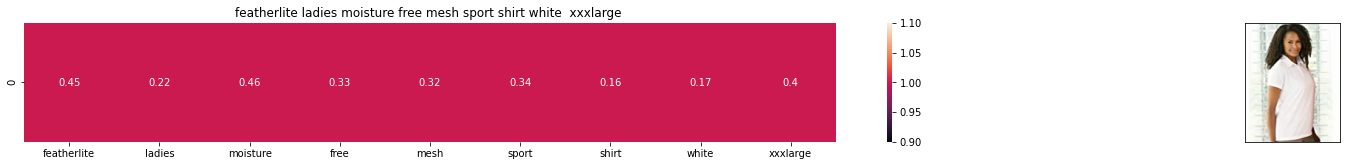

ASIN : B003BSRPB0
BRAND : featherlite 
Eucliden distance from the given image : 0.0


<IPython.core.display.Javascript object>

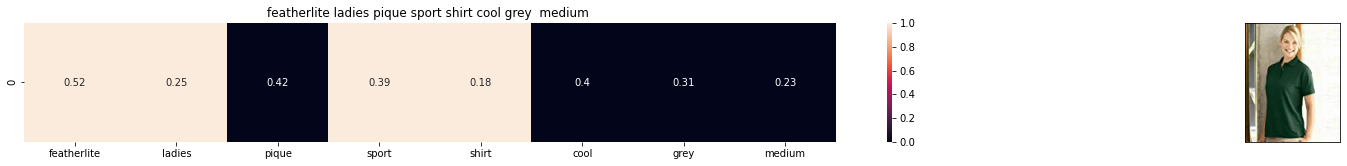

ASIN : B003BSRRS6
BRAND : featherlite 
Eucliden distance from the given image : 1.0495277717359495


<IPython.core.display.Javascript object>

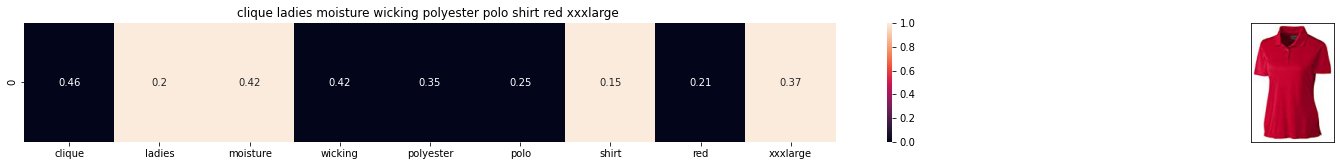

ASIN : B00KXWX3U4
BRAND : clique 
Eucliden distance from the given image : 1.087222862908573


<IPython.core.display.Javascript object>

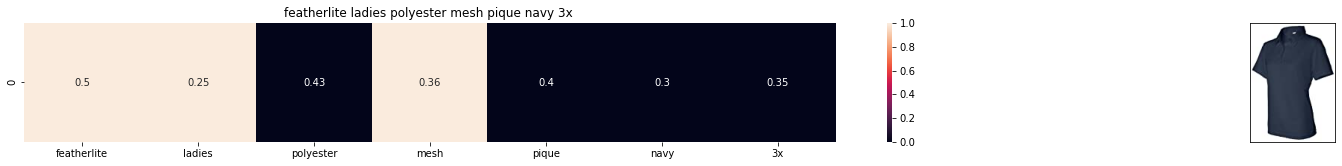

ASIN : B0079BKWOM
BRAND : featherlite 
Eucliden distance from the given image : 1.0999038960710477


<IPython.core.display.Javascript object>

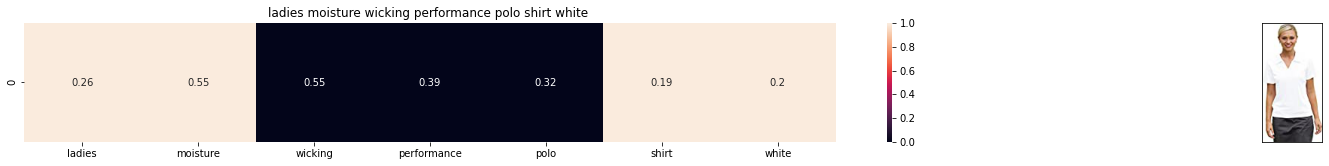

ASIN : B00W4KNEG6
BRAND : whispering pines sportwear 
Eucliden distance from the given image : 1.1205690780178534


<IPython.core.display.Javascript object>

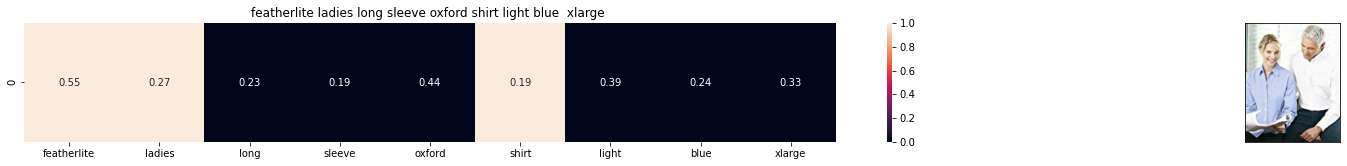

ASIN : B003BSQPW0
BRAND : featherlite 
Eucliden distance from the given image : 1.153104962177847


<IPython.core.display.Javascript object>

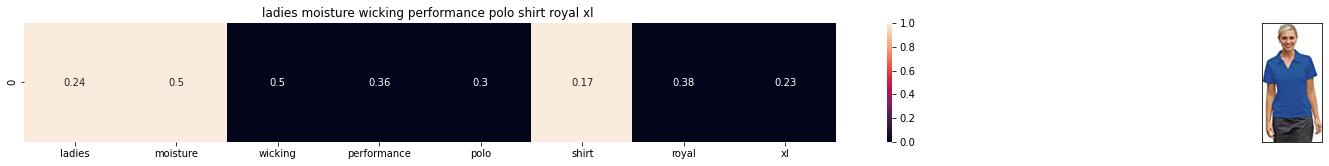

ASIN : B00SU0KD7C
BRAND : whispering pines sportwear 
Eucliden distance from the given image : 1.1757683551688611


<IPython.core.display.Javascript object>

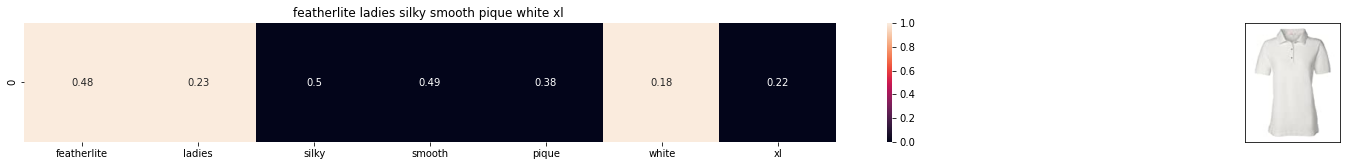

ASIN : B0079BMKDS
BRAND : featherlite 
Eucliden distance from the given image : 1.1867615663729798


<IPython.core.display.Javascript object>

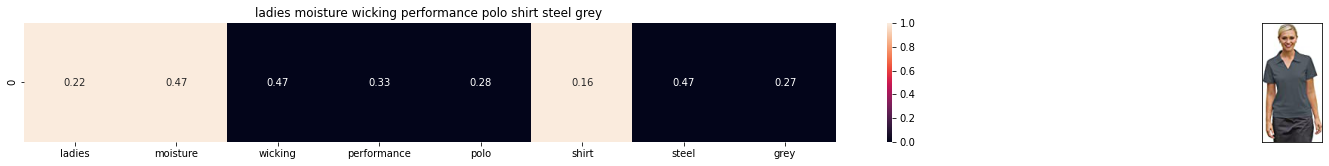

ASIN : B00SU0KFD4
BRAND : whispering pines sportwear 
Eucliden distance from the given image : 1.1916632922264796


<IPython.core.display.Javascript object>

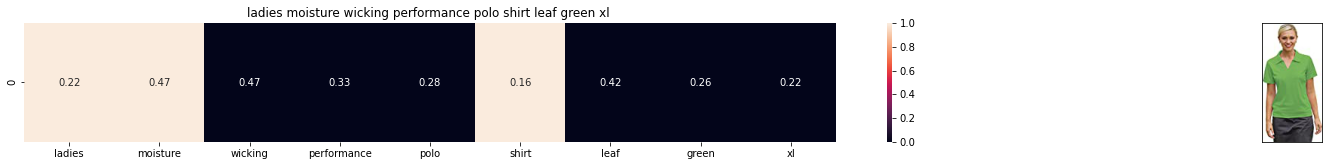

ASIN : B00SU0KFJI
BRAND : whispering pines sportwear 
Eucliden distance from the given image : 1.1916828125501633
Average euclidean distance is 1.0256204597229754


In [59]:
print('Getting the similar items for document id and number of items')
tfidf_model(0, 10)

## 3. Modèle basée de IDF sur les titres de produits

In [60]:
idf_title_vectorizer = CountVectorizer()
idf_title_features = idf_title_vectorizer.fit_transform(data['title'])

# idf_title_features.shape = #data_points * #words_in_corpus
# CountVectorizer(). fit_transform(courpus) retourne une matrice sparase de dimensions #data_points * #words_in_corpus
# idf_title_features[doc_id, index_of_word_in_corpus] = nombre de fois que le mot s’est produit dans ce doc

In [61]:
def n_containing(word):
    # retourne le nombre de documents ayant le mot donné
    return sum(1 for blob in data['title'] if word in blob.split())

def idf(word):
    # idf = log(#number of docs / #number of docs which had the given word)
    return math.log(data.shape[0] / (n_containing(word)))

In [62]:
idf_euclidean=[]
def idf_model(doc_id, num_results):
    # doc_id : apparel’s id in given corpus
    # pairwise_dist stockera la distance entre les vêtements d’entrée donnés et tous les autres vêtements
    # la métrique que nous avons utilisée ici est cosinus, la distance du coside est mesurée comme suit : K(X, Y) = <X, Y> / (||X||*||Y||)
    pairwise_dist = pairwise_distances(idf_title_features,idf_title_features[doc_id])

    # np.argsort retournera des indices de 9 plus petites distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists stockera les 9 plus petites distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #indices de la base de données des 9 plus petites distes
    df_indices = list(data.index[indices])

    for i in range(0,len(indices)):
        get_result(indices[i],data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], 'idf')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print('Brand :',data['brand'].loc[df_indices[i]])
        idf_euclidean.append(pdists[i])
        print ('euclidean distance from the given image :', pdists[i])
        print('='*125)
    print('Average euclidean distance is ',sum(idf_euclidean)/num_results)

<IPython.core.display.Javascript object>

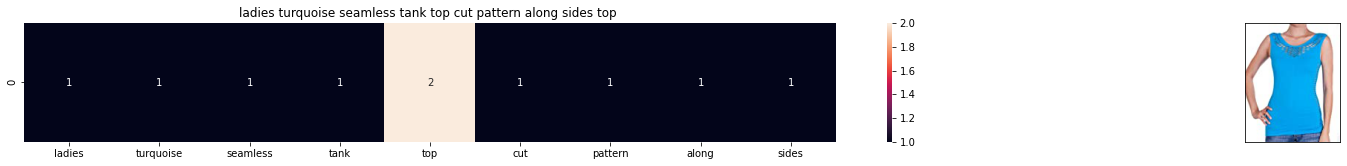

ASIN : B004TUJ7GK
Brand : finebrandshop 
euclidean distance from the given image : 0.0


<IPython.core.display.Javascript object>

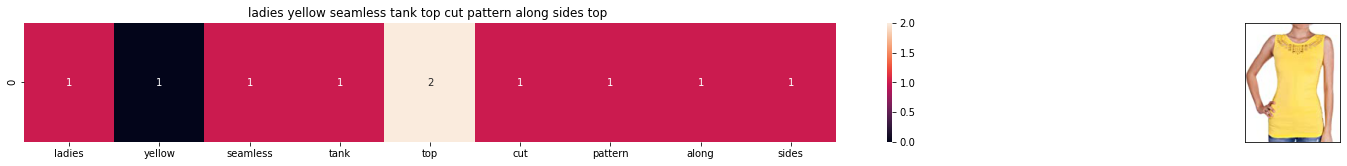

ASIN : B004TUD76Q
Brand : finebrandshop 
euclidean distance from the given image : 1.4142135623730951


<IPython.core.display.Javascript object>

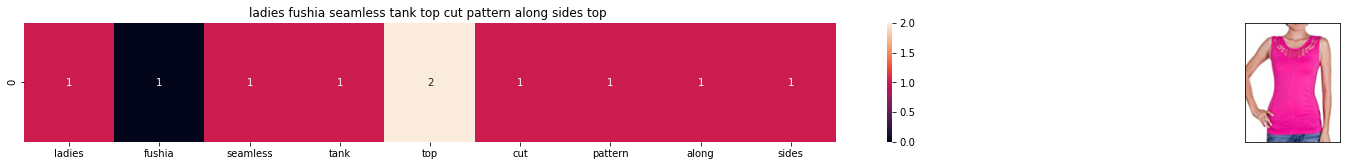

ASIN : B004TUJ6MA
Brand : finebrandshop 
euclidean distance from the given image : 1.4142135623730951


<IPython.core.display.Javascript object>

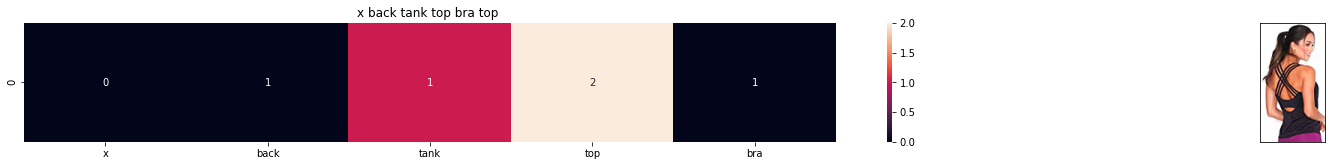

ASIN : B001LOWFUC
Brand : fitness etc 
euclidean distance from the given image : 3.0


<IPython.core.display.Javascript object>

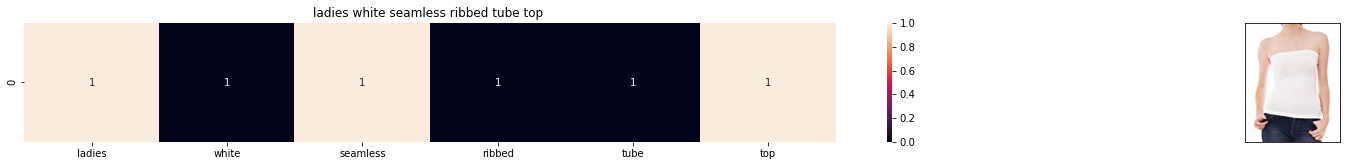

ASIN : B009286M6W
Brand : finebrandshop 
euclidean distance from the given image : 3.1622776601683795
Average euclidean distance is  1.7981409569829139


In [63]:
idf_model(56,5)

## 4. Modèle basée de NearestNeighbors(KNN)

In [64]:
import numpy as np
import pandas as pd 
from sklearn.neighbors import NearestNeighbors

In [65]:
df.columns

Index(['id', 'index', 'asin', 'brand', 'color', 'medium_image_url',
       'product_type_name', 'title', 'formatted_price', 'digital'],
      dtype='object')

In [66]:
sparse_matrix_products = df[["color","brand","product_type_name","formatted_price"]]

In [67]:
sparse_matrix_products["normalized_price"]=(sparse_matrix_products["formatted_price"]-sparse_matrix_products["formatted_price"].min())/(sparse_matrix_products["formatted_price"].max()-sparse_matrix_products["formatted_price"].min())

In [68]:
sparse_matrix_products["normalized_price"].describe()

count    16315.000000
mean         0.034747
std          0.047163
min          0.000000
25%          0.012377
50%          0.020081
75%          0.036724
max          1.000000
Name: normalized_price, dtype: float64

In [69]:
sparse_matrix_products.drop("formatted_price",axis=1,inplace=True)

In [70]:
sparse_matrix_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16315 entries, 0 to 16314
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   color              16315 non-null  object 
 1   brand              16315 non-null  object 
 2   product_type_name  16315 non-null  object 
 3   normalized_price   16315 non-null  float64
dtypes: float64(1), object(3)
memory usage: 510.0+ KB


In [71]:
sparse_matrix_products = pd.get_dummies(sparse_matrix_products)

In [72]:
model = NearestNeighbors(n_neighbors=15,
                         metric='cosine',
                         algorithm='brute',
                         n_jobs=-1)
model.fit(sparse_matrix_products)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=15)

In [83]:
import pickle 

# Its important to use binary mode 
knnPickle = open('knnpickle_file', 'wb') 

# source, destination 
pickle.dump(model, knnPickle)                      


In [84]:

# load the model from disk
loaded_model = pickle.load(open('knnpickle_file', 'rb'))

distances,indices=loaded_model.kneighbors(sparse_matrix_products.iloc[query_index,:].values.reshape(1,-1))

In [88]:
#query_index=np.random.choice(ddx.shape[0])
query_index=3
#print(ddx.iloc[query_index,:])
#print("Distances -->",distances," Indices -->",indices)

distances,indices=model.kneighbors(sparse_matrix_products.iloc[query_index,:].values.reshape(1,-1))

print(len(distances.flatten()))
M=[]
D=[]
for i in range(0,10):
    if i==0:
        print("Recommendation for {0}:\n".format(sparse_matrix_products.index[query_index]))
    else:
        M.append(sparse_matrix_products.index[indices.flatten()[i]])
        D.append(distances.flatten()[i])
        print("{0}: {1}, with distance of {2}".format(i,sparse_matrix_products.index[indices.flatten()[i]],distances.flatten()[i]))
 

15
Recommendation for 3:

1: 63, with distance of 1.0881428765818768e-05
2: 216, with distance of 1.0908512877327858e-05
3: 220, with distance of 1.375646299683897e-05
4: 11, with distance of 3.322765703517305e-05
5: 15293, with distance of 0.3333265765983723
6: 13613, with distance of 0.33332657683404643
7: 12644, with distance of 0.3333265771033882
8: 13526, with distance of 0.3333265771033882
9: 11000, with distance of 0.3333265771033882


<IPython.core.display.Javascript object>

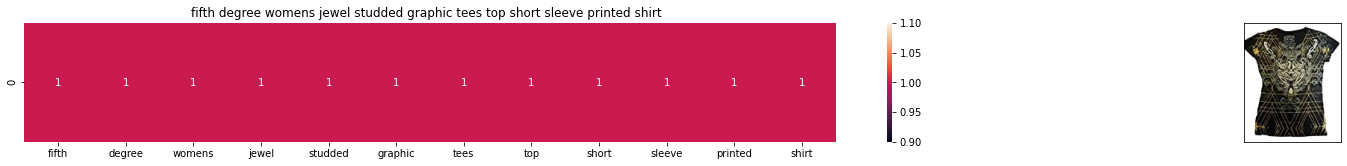

ASIN : B01M5HU63E
Brand: fifth degree 
Color: black
Price: 14.99
Title: fifth degree womens jewel studded graphic tees top short sleeve printed shirt  
La distance est : 1.0881428765818768e-05


<IPython.core.display.Javascript object>

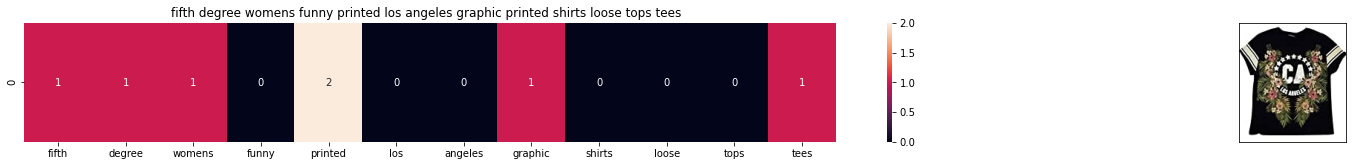

ASIN : B01MCWSBHF
Brand: fifth degree 
Color: black
Price: 15.0
Title: fifth degree womens funny printed los angeles graphic printed shirts loose tops tees  
La distance est : 1.0908512877327858e-05


<IPython.core.display.Javascript object>

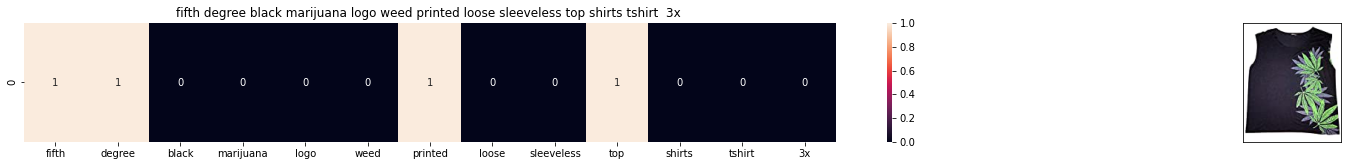

ASIN : B01N1L3MR0
Brand: fifth degree 
Color: black
Price: 15.99
Title: fifth degree black marijuana logo weed printed loose sleeveless top shirts tshirt  3x 
La distance est : 1.375646299683897e-05


<IPython.core.display.Javascript object>

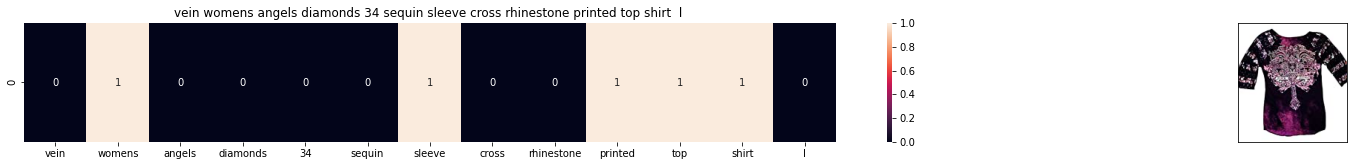

ASIN : B01NAZ3L3C
Brand: fifth degree 
Color: black
Price: 21.0
Title: vein womens angels diamonds 34 sequin sleeve cross rhinestone printed top shirt  l 
La distance est : 3.322765703517305e-05


<IPython.core.display.Javascript object>

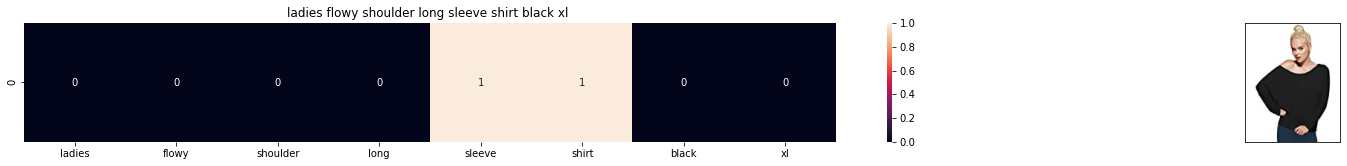

ASIN : B00BR9I35C
Brand: bella 
Color: black
Price: 10.4
Title: ladies flowy shoulder long sleeve shirt black xl 
La distance est : 0.3333265765983723


<IPython.core.display.Javascript object>

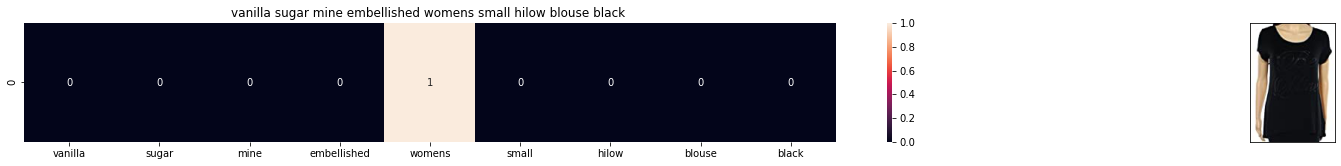

ASIN : B074TVGK55
Brand: vanilla sugar 
Color: black
Price: 10.47
Title: vanilla sugar mine embellished womens small hilow blouse black 
La distance est : 0.33332657683404643


<IPython.core.display.Javascript object>

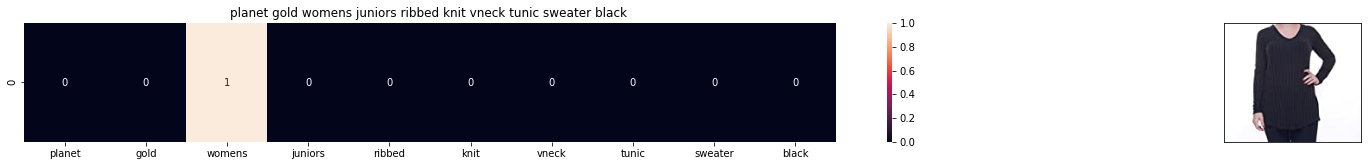

ASIN : B01MQKPKWB
Brand: planet gold 
Color: black
Price: 10.49
Title: planet gold womens juniors ribbed knit vneck tunic sweater black 
La distance est : 0.3333265771033882


<IPython.core.display.Javascript object>

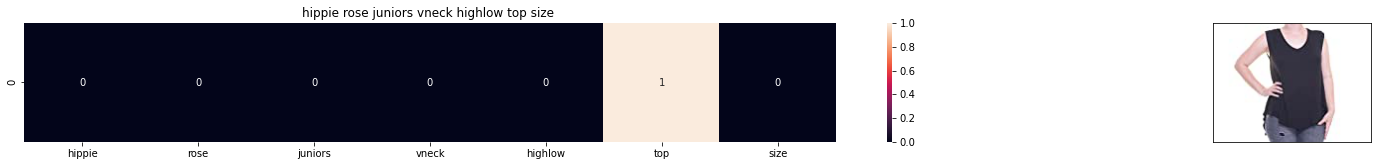

ASIN : B0711QJHTY
Brand: hippie rose 
Color: black
Price: 10.49
Title: hippie rose juniors vneck highlow top size 
La distance est : 0.3333265771033882


<IPython.core.display.Javascript object>

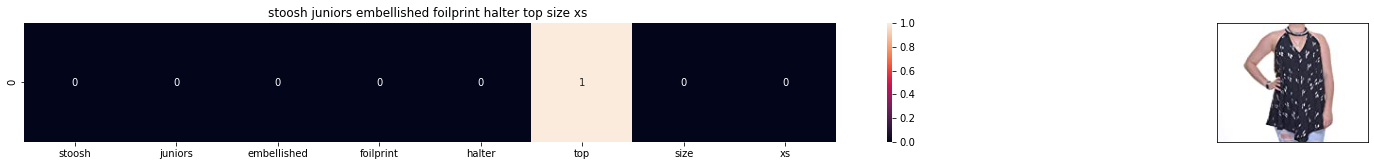

ASIN : B06XSYK29V
Brand: stoosh 
Color: black
Price: 10.49
Title: stoosh juniors embellished foilprint halter top size xs 
La distance est : 0.3333265771033882


In [89]:
for i in range(0,len(M)):
    get_result(M[i],df['title'].loc[M[0]], df['title'].loc[M[i]], df['medium_image_url'].loc[M[i]], 'bag_of_words')
    print('ASIN :',df['asin'].loc[M[i]])
    print ('Brand:', df['brand'].loc[M[i]])
    print ('Color:', df['color'].loc[M[i]])
    print ('Price:', df['formatted_price'].loc[M[i]])
    print ('Title:', df['title'].loc[M[i]])
    print ("La distance est :", D[i])
    print('='*60)



### Comparaison des modèles

In [80]:
euclidean_distance=[]
num_results=20
euclidean_distance.append(sum(bag_of_words_euclidean)/num_results)
euclidean_distance.append(sum(tf_idf_euclidean)/num_results)
euclidean_distance.append(sum(idf_euclidean)/num_results)
x=euclidean_distance
y=[]
for i in range(0,47,3):
    y.append(i)

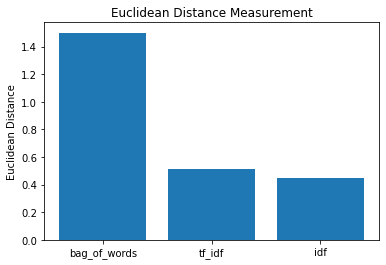

In [81]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
objects = ('bag_of_words', 'tf_idf', 'idf')
y_pos = np.arange(len(objects))
plt.bar(objects,x)
plt.ylabel('Euclidean Distance')
plt.title('Euclidean Distance Measurement')
plt.savefig('Comparaison des modeles.png')
plt.show()